In [117]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [118]:
#read origin img 
image = cv2.imread('lena.bmp',0)
rows,cols = image.shape
img = np.asarray(image)
print(rows//8,cols//8)

64 64


### Down sampling

In [119]:
d_row = rows//8
d_col = cols//8 
down_sample = np.full((d_row,d_col),0)
for i in range (d_row):
    for j in range (d_col):
        down_sample[i][j] = img[8*i][8*j]
        if down_sample[i][j] < 128:
            down_sample[i][j] = 0
        else :
            down_sample[i][j] = 255

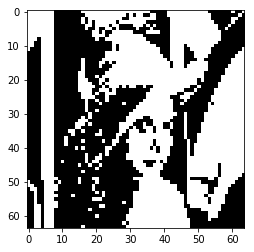

In [120]:
X = down_sample
fig, ax = plt.subplots()
ax.imshow(X, interpolation='nearest',cmap = 'gray')
numrows, numcols = X.shape
plt.show()

In [121]:
def get_val(i,j,a):
    if a == 1:
        if j+1 >= d_col:
            return 0
        else:
            return down_sample[i][j+1]
    elif a == 2:
        if i-1 < 0:
            return 0
        else: 
            return down_sample[i-1][j]
    elif a == 3:
        if j-1 < 0:
            return 0
        else:
            return down_sample[i][j-1]
    elif a == 4:
        if i+1 >= d_row:
            return 0
        else:
            return down_sample[i+1][j]
    elif a == 5:
        if i+1 >= d_row or j+1 >= d_col:
            return 0
        else:
            return down_sample[i+1][j+1]
    elif a == 6:
        if i-1 < 0 or j+1 >= d_col:
            return 0
        else:
            return down_sample[i-1][j+1]
    elif a == 7:
        if i-1 < 0 or j-1 < 0:
            return 0
        else:
            return down_sample[i-1][j-1]
    elif a == 8:
        if i+1 >= d_row or j-1 < 0:
            return 0
        else:
            return down_sample[i+1][j-1]
        
def h(i,j,p1,p2,p3):
    v0 = down_sample[i][j]
    v1 = get_val(i,j,p1)
    v2 = get_val(i,j,p2)
    v3 = get_val(i,j,p3)
    #return q = 0 / r = 1 / s = 2
    
    if v0 != v1:
        return 2
    elif v0 == v2 and v0 == v3:
        return 1
    else:
        return 0
        
def f(a,b,c,d):
    if a==b and b==c and c==d and d == 1:
        return 5
    cnt = 0
    if a == 0:
        cnt+=1
    if b == 0:
        cnt+=1
    if c == 0:
        cnt+=1
    if d == 0:
        cnt+=1
    return cnt

def Yokoi():
    for i in range (d_row):
        for j in range (d_col):
            if down_sample[i][j] == 0:
                yokoi[i][j] = 0
                continue
            yokoi[i][j] = f(h(i,j,1,6,2),h(i,j,2,7,3),h(i,j,3,8,4),h(i,j,4,5,1))

In [122]:
def h_4(i,j):
    cnt=0
    if i+1 < d_row:
        if yokoi[i+1][j] == 1: 
            return 1
    if i-1 >= 0:
        if yokoi[i-1][j] == 1: 
            return 1
    if j+1 < d_col:
        if yokoi[i][j+1] == 1: 
            return 1
    if j-1 >= 0:
        if yokoi[i][j-1] == 1: 
            return 1
    return 0

def mark_thining():
    # q=1, p=2, otherwise 0 
    for i in range (d_row):
        for j in range (d_col):
            if yokoi[i][j] == 0:
                mark[i][j] = 0
            elif yokoi[i][j] == 1 and h_4(i,j) != 0:
                mark[i][j] = 2
            else:
                mark[i][j] = 1
        

In [123]:
def h_thining(i,j,p1,p2,p3):
    v0 = down_sample[i][j]
    v1 = get_val(i,j,p1)
    v2 = get_val(i,j,p2)
    v3 = get_val(i,j,p3)
    
    if v0 == v1:
        if v0!=v2 or v0 != v3:
            return 1
    return 0

def f_thining(a,b,c,d,i,j):
    if a+b+c+d == 1: 
        return 0
    else:
        return down_sample[i][j]

In [124]:
yokoi = np.full((d_row,d_col),0)
mark = np.full((d_row,d_col),0)
thin = np.full((d_row,d_col),0)

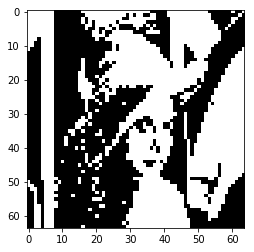

In [125]:
X = down_sample
fig, ax = plt.subplots()
ax.imshow(X, interpolation='nearest',cmap = 'gray')
numrows, numcols = X.shape

plt.show()

In [126]:
for time in range(7):
    Yokoi()
    mark_thining()
    for i in range (d_row):
        for j in range (d_col):      
            if mark[i][j] == 2:
                down_sample[i][j] = f_thining(h_thining(i,j,1,6,2),h_thining(i,j,2,7,3),h_thining(i,j,3,8,4),h_thining(i,j,4,5,1),i,j)
                

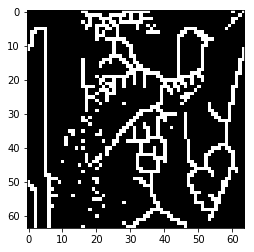

In [127]:
X = down_sample
fig, ax = plt.subplots()
ax.imshow(X, interpolation='nearest',cmap = 'gray')
numrows, numcols = X.shape

plt.show()